In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\hi\Desktop\dse\Classificaion\dataset\telco_chrun_encoded.csv')
df

,gender,senior,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,total_charges,churn,avg_monthly_charges,internet_service-fiber_optic,internet_service-no,contract-one_year,contract-two_year,payment_method-credit_card_auto,payment_method-electronic_check,payment_method-mailed_check
0,1,0,1,0,1,0,0,0,1,0,...,29.85,0,29.850000,0,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1889.50,0,55.573529,0,0,1,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,108.15,1,54.075000,0,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1840.75,0,40.905556,0,0,1,0,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,151.65,1,75.825000,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,1,1,24,1,1,1,0,1,...,1990.50,0,82.937500,0,0,1,0,0,0,1
7028,1,0,1,1,72,1,1,0,1,1,...,7362.90,0,102.262500,1,0,1,0,1,0,0
7029,1,0,1,1,11,0,0,1,0,0,...,346.45,0,31.495455,0,0,0,0,0,1,0
7030,0,1,1,0,4,1,1,0,0,0,...,306.60,1,76.650000,1,0,0,0,0,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 25 columns):
gender                             7032 non-null int64
senior                             7032 non-null int64
partner                            7032 non-null int64
dependents                         7032 non-null int64
tenure                             7032 non-null int64
phone_service                      7032 non-null int64
multiple_lines                     7032 non-null int64
online_security                    7032 non-null int64
online_backup                      7032 non-null int64
device_protection                  7032 non-null int64
tech_support                       7032 non-null int64
streaming_tv                       7032 non-null int64
streaming_movies                   7032 non-null int64
paperless_billing                  7032 non-null int64
monthly_charges                    7032 non-null float64
total_charges                      7032 non-null float64
churn    

In [4]:
df['churn'].value_counts()

0    5163
1    1869
Name: churn, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split

In [7]:
x = df.drop('churn',axis=1)
y = df['churn']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

## Ada boost Classifier (adaptive boost)

In [14]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(random_state=1)
ada.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=1)

In [10]:
def evaluation_train_test(model,X_train,y_train,X_test,y_test):
   y_train_prob = model.predict_proba(X_train)[:,1]
   y_train_pred = model.predict(X_train)
   y_test_prob = model.predict_proba(X_test)[:,1]
   y_test_pred = model.predict(X_test)
   from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,classification_report
   print('Train accuracy score of',model,':',accuracy_score(y_train,y_train_pred))
   print('Test accuracy score of ',model,':',accuracy_score(y_test,y_test_pred))
   
   print('rou_auc_score train',roc_auc_score(y_train,y_train_prob))
   print('rou_auc_score test',roc_auc_score(y_test,y_test_prob))
   print('Train classification report \n',classification_report(y_train,y_train_pred))
   print('Test classification report \n',classification_report(y_test,y_test_pred))

   
   fig,axes =plt.subplots(1,2,figsize =(15,5))
   sns.heatmap(confusion_matrix(y_train,y_train_pred),annot =True,fmt ='g',ax =axes[0])
   #plt.show()
   sns.heatmap(confusion_matrix(y_test,y_test_pred),annot =True,fmt ='g',ax =axes[1])
   plt.show()
   
   def roc_curves(y_true,y_true_prob):
         
         fpr, tpr, thresholds  =roc_curve(y_true,y_true_prob)
         thresholds[0] = thresholds[0]-1
         plt.plot(fpr,tpr)
         plt.plot(fpr,fpr)
         plt.plot(fpr,thresholds)
         plt.show();
   print('roc curve for Train')
   roc_curves(y_train,y_train_prob)
   print('roc curve for Test')
   roc_curves(y_test,y_test_prob)

Train accuracy score of AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=1) : 0.8108492482730597
Test accuracy score of  AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=1) : 0.8004739336492891
rou_auc_score train 0.8608371131967858
rou_auc_score test 0.8425764027693288
Train classification report 
               precision    recall  f1-score   support

           0       0.85      0.90      0.88      3608
           1       0.68      0.56      0.61      1314

    accuracy                           0.81      4922
   macro avg       0.76      0.73      0.74      4922
weighted avg       0.80      0.81      0.80      4922

Test classification report 
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      1555
           1       0.64      0.54      0.59       555

    accuracy       

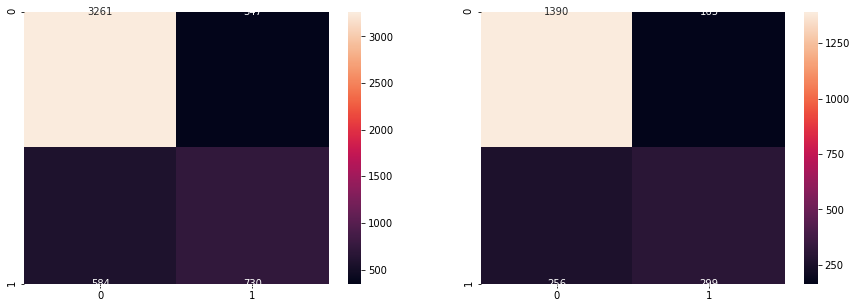

roc curve for Train


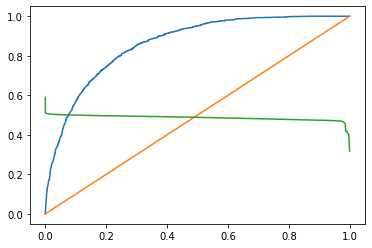

roc curve for Test


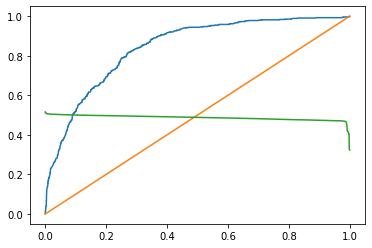

In [15]:
evaluation_train_test(ada,x_train,y_train,x_test,y_test)

## Light GBM

In [21]:
import lightgbm as lgb

In [22]:
lgbc  = lgb.LGBMClassifier()

Train accuracy score of LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0) : 0.8951645672490858
Test accuracy score of  LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0) : 0.788151658

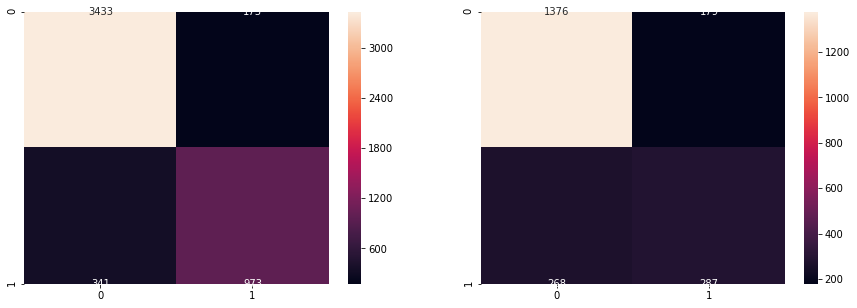

roc curve for Train


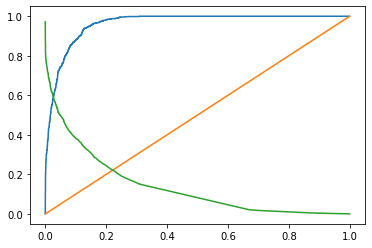

roc curve for Test


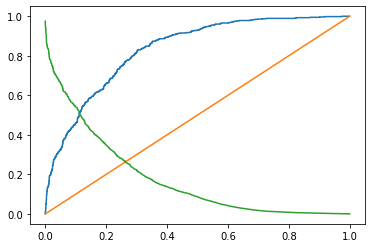

In [23]:
lgbc.fit(x_train,y_train)
evaluation_train_test(lgbc,x_train,y_train,x_test,y_test)

In [28]:
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

params = {
    'n_estimators' : sp_randint(50,200),
    'num_leaves': sp_randint(10,50),
    'max_depth' : sp_randint(2,15),
    'learning_rate': sp_uniform(0,1),
    'min_child_samples' : sp_randint(2,50)}

rsearch_lgbm = RandomizedSearchCV(lgbc,param_distributions=params,cv=3,random_state=1,n_jobs=-1,n_iter=200,scoring='roc_auc')

rsearch_lgbm.fit(x,y)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_leaves=31, objective=None,
                                            random_state=None, reg_alpha=0.0,
                                            reg_lambda=0.0, sile...
                                        'min_child_samples': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000028

In [29]:
rsearch_lgbm.best_params_

{'learning_rate': 0.03905478323288236,
 'max_depth': 12,
 'min_child_samples': 10,
 'n_estimators': 80,
 'num_leaves': 17}

Train accuracy score of LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.03905478323288236,
               max_depth=12, min_child_samples=10, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=80, n_jobs=-1, num_leaves=17,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0) : 0.8317757009345794
Test accuracy score of  LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.03905478323288236,
               max_depth=12, min_child_samples=10, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=80, n_jobs=-1, num_leaves=17,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_fo

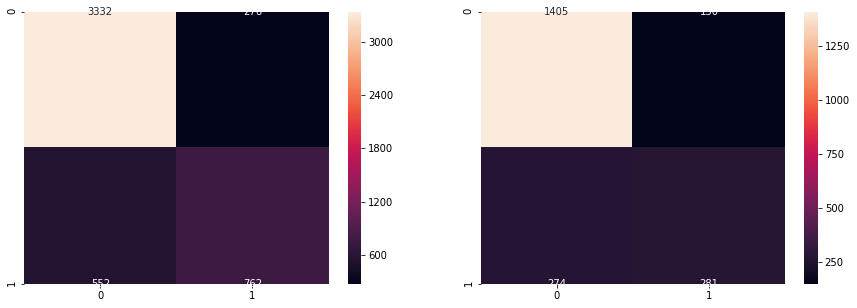

roc curve for Train


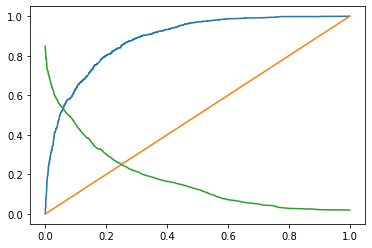

roc curve for Test


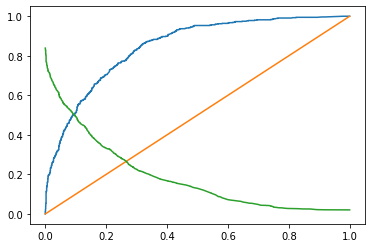

In [30]:
lgbc  = lgb.LGBMClassifier(**rsearch_lgbm.best_params_)
lgbc.fit(x_train,y_train)
evaluation_train_test(lgbc,x_train,y_train,x_test,y_test)